# AMOC diagnostics: TO DO? See /glade/u/home/dafydd/NGC_AMOC_draft_figures for code
This notebook takes the output from the runs set up in notebook `4_`...`.ipynb` and presents multiple diagnostics used in our analysis.

In [ ]:
from DPC_functions import *

# Figures 1 and 2

In [2]:
# Load the data: leading COF, OOF and EOF for heat flux

# forcingdir='/where/you/downloaded/ECCO/files/other/flux-forced/forcing/'
forcingdir='/glade/work/dafydd/ECCOv4r4_input/other/flux-forced/forcing/'

#adjoint_output_location=/parent/directory/to/your/ECCO/adjoint/runs/
adjoint_output_location='/glade/work/dafydd/PLEIADES_OUTPUT/'

EOF1_hflux=np.load(forcingdir+'hflux_eigenvectors.npy')[:,-1]
hflux_V   =np.load(forcingdir+'hflux_eigenvalues.npy')

EOF1_tauxy=np.load(forcingdir+'tauxy_eigenvectors.npy')[:,-1]
tauxy_V   =np.load(forcingdir+'tauxy_eigenvalues.npy')

SO55_hflux =np.load(adjoint_output_location+'SO55_hflux.npy')[:,-1]
SO55_tauxy =np.load(adjoint_output_location+'SO55_tauxy.npy')[:,-1]

SO25_hflux =np.load(adjoint_output_location+'SO25_hflux.npy')[:,-1]
SO25_tauxy =np.load(adjoint_output_location+'SO25_tauxy.npy')[:,-1]

DPC55_hflux=np.load(adjoint_output_location+'DPC55_hflux.npy')[:,-1]
EDF55_hflux=np.load(adjoint_output_location+'EDF55_hflux.npy')[:,-1]
EDF55_hflux=EDF55_hflux/np.linalg.norm(EDF55_hflux)

DPC25_hflux=np.load(adjoint_output_location+'DPC25_hflux.npy')[:,-1]
EDF25_hflux=np.load(adjoint_output_location+'EDF25_hflux.npy')[:,-1]
EDF25_hflux=EDF25_hflux/np.linalg.norm(EDF25_hflux)

DPC55_tauxy=np.load(adjoint_output_location+'DPC55_tauxy.npy')[:,-1]
EDF55_tauxy=np.load(adjoint_output_location+'EDF55_tauxy.npy')[:,-1]
EDF55_tauxy=EDF55_tauxy/np.linalg.norm(EDF55_tauxy)

DPC25_tauxy=np.load(adjoint_output_location+'DPC25_tauxy.npy')[:,-1]
EDF25_tauxy=np.load(adjoint_output_location+'EDF25_tauxy.npy')[:,-1]
EDF25_tauxy=EDF25_tauxy/np.linalg.norm(EDF25_tauxy)

Figure 1
Figure 2


/glade/u/home/dafydd/miniconda3/envs/oce/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/glade/u/home/dafydd/miniconda3/envs/oce/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/glade/u/home/dafydd/miniconda3/envs/oce/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


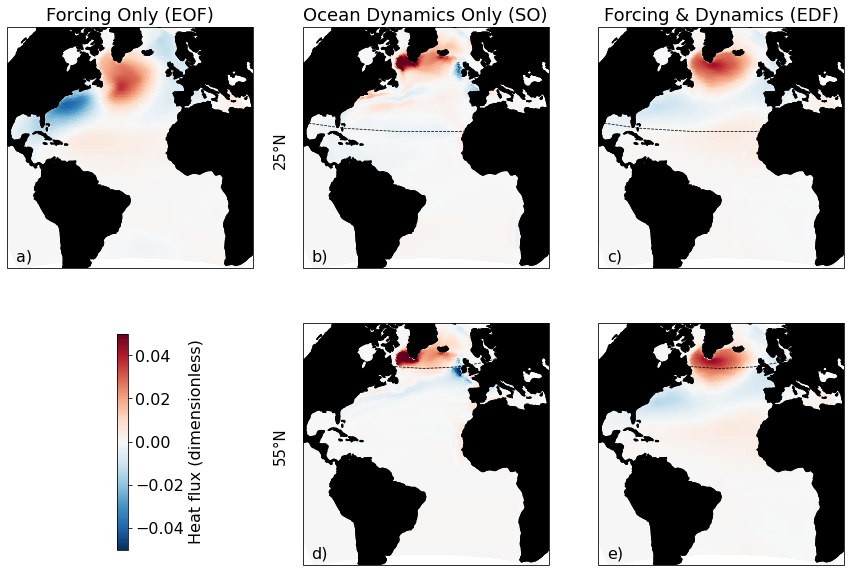

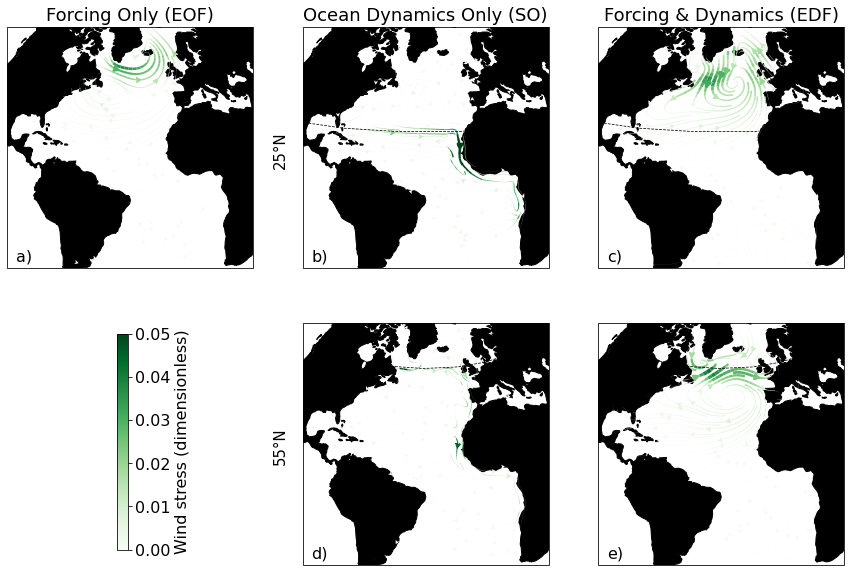

In [14]:
CMAP=plt.cm.get_cmap('RdBu_r').__copy__();CMAP.set_bad('k')
VLIM=0.05

print('Figure 1')
fig,ax=plt.subplots(2,3)
# HF EOF1
p,AX=unpack_and_map(EOF1_hflux,ax=ax[0,0],vmin=-VLIM,vmax=VLIM,cmap=CMAP);ax[0,0]=AX;
# HF SOs
p,AX=unpack_and_map(SO25_hflux,ax=ax[0,1],vmin=-VLIM,vmax=VLIM,cmap=CMAP);ax[0,1]=AX;
AX.plot([-100,100],[25,25],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);
p,AX=unpack_and_map(SO55_hflux,ax=ax[1,1],vmin=-VLIM,vmax=VLIM,cmap=CMAP);ax[1,1]=AX;
AX.plot([-100,100],[55,55],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);
# HF EDFs
p,AX=unpack_and_map(EDF25_hflux,ax=ax[0,2],vmin=-VLIM,vmax=VLIM,cmap=CMAP);ax[0,2]=AX;
AX.plot([-100,100],[25,25],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);
p,AX=unpack_and_map(EDF25_hflux,ax=ax[1,2],vmin=-VLIM,vmax=VLIM,cmap=CMAP);ax[1,2]=AX;
AX.plot([-100,100],[55,55],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);

ax[1,0].remove()
# cbax1=fig.add_axes([0.2,0.5,0.1,0.175])
cbax1=fig.add_axes([0.125,0.15,0.12,0.3]);
cb=fig.colorbar(p,ax=cbax1);
cb.ax.set_ylabel('Heat flux (dimensionless)',fontsize=16);
# cb.ax.set_ylabel('HELLO',fontsize=12);
cb.ax.tick_params(labelsize=16);
cbax1.set_visible(False);
####

ax[0,0].set_title('Forcing Only (EOF)',fontsize=18);
ax[0,1].set_title('Ocean Dynamics Only (SO)',fontsize=18);
ax[0,2].set_title('Forcing & Dynamics (EDF)',fontsize=18);
ax[0,1].text(-8e6,1e6,'25°N',rotation=90,fontsize=15);
ax[1,1].text(-8e6,1e6,'55°N',rotation=90,fontsize=15);
[ax.flatten()[i].text(-6e6,-4e6,['a)','b)','c)','_','d)','e)'][i],fontsize=16) for i in range(len(ax.flatten()))];
fig.set_size_inches(15,10);
fig.savefig('figures_pdf/figure_1.png',bbox_inches='tight')

#####################################################################################################################################
#####################################################################################################################################

print('Figure 2')

fig,ax=plt.subplots(2,3)
# UV EOFs
s,AX=atlstream(EOF1_tauxy,ax=ax[0,0],widthfactor=4,ss=1,density=4,arrowsize=1.,arrowstyle='fancy',cmap='Greens',vmin=0,vmax=VLIM);ax[0,0]=AX;
# UV SOs
s,AX=atlstream(SO25_tauxy,ax=ax[0,1],widthfactor=4,ss=1,density=4,arrowsize=1.,arrowstyle='fancy',cmap='Greens',vmin=0,vmax=VLIM);ax[0,1]=AX;
AX.plot([-100,100],[25,25],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);
s,AX=atlstream(SO55_tauxy,ax=ax[1,1],widthfactor=4,ss=1,density=4,arrowsize=1.,arrowstyle='fancy',cmap='Greens',vmin=0,vmax=VLIM);ax[1,1]=AX;
AX.plot([-100,100],[55,55],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);
# UV EDFs
s,AX=atlstream(EDF25_tauxy,ax=ax[0,2],widthfactor=4,ss=1,density=4,arrowsize=1.,arrowstyle='fancy',cmap='Greens',vmin=0,vmax=VLIM);ax[0,2]=AX;
AX.plot([-100,100],[25,25],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);
s,AX=atlstream(EDF55_tauxy,ax=ax[1,2],widthfactor=4,ss=1,density=4,arrowsize=1.,arrowstyle='fancy',cmap='Greens',vmin=0,vmax=VLIM);ax[1,2]=AX;
AX.plot([-100,100],[55,55],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.75);

####
ax[1,0].remove();
# cbax1=fig.add_axes([0.2,0.5,0.1,0.175])
cbax2=fig.add_axes([0.125,0.15,0.12,0.3]);
cb=fig.colorbar(s.lines,ax=cbax2);
cb.ax.set_ylabel('Wind stress (dimensionless)',fontsize=16);
cb.ax.tick_params(labelsize=16);
cbax2.set_visible(False);


ax[0,0].set_title('Forcing Only (EOF)',fontsize=18);
ax[0,1].set_title('Ocean Dynamics Only (SO)',fontsize=18);
ax[0,2].set_title('Forcing & Dynamics (EDF)',fontsize=18);
ax[0,1].text(-8e6,1e6,'25°N',rotation=90,fontsize=15);
ax[1,1].text(-8e6,1e6,'55°N',rotation=90,fontsize=15);
[ax.flatten()[i].text(-6e6,-4e6,['a)','b)','c)','_','d)','e)'][i],fontsize=16) for i in range(len(ax.flatten()))];

fig.set_size_inches(15,10)

fig.savefig('figures_pdf/figure_2.png',bbox_inches='tight')

# Figure 3: MOC Hovmöller plots
In order to calculate the Ekman transport component, we use the `oceTAUX`, `oceTAUY`, and `RHOAnoma` variables of the control and modified forcing runs set up in `4_`...`.ipynb`. These are output at monthly frequency as specified by the `data.diagnostics` file at the end of that notebook. The calculation is done by calling the `calc_msf.py` script with the directory in which the output files are stored, producing an `atlantic_moc_diagnostics.nc` file containing the output of the `ECCOv4-py` `calc_meridional_stf` function, plus the Ekman transport.

In [4]:
eccorundir='/wherever/you/set/up/modified_forcing_runs/'
eccorundir='/glade/work/dafydd/ECCOv4r4_runs/modified_FF_runs/'

MOC25_hflux=    xr.open_dataset(eccorundir+'DPC25_hflux/atlantic_moc_diagnostics.nc').moc.T
MOC55_hflux=    xr.open_dataset(eccorundir+'DPC55_hflux/atlantic_moc_diagnostics.nc').moc.T

MOC25_tauxy=    xr.open_dataset(eccorundir+'DPC25_tauxy/atlantic_moc_diagnostics.nc').moc.T
MOC55_tauxy=    xr.open_dataset(eccorundir+'DPC55_tauxy/atlantic_moc_diagnostics.nc').moc.T

EKM25_tauxy=1e6*xr.open_dataset(eccorundir+'DPC25_tauxy/atlantic_moc_diagnostics.nc').ekman.T
EKM55_tauxy=1e6*xr.open_dataset(eccorundir+'DPC55_tauxy/atlantic_moc_diagnostics.nc').ekman.T


MOCv4_cntrl=    xr.open_dataset(eccorundir+'CONTROL/atlantic_moc_diagnostics.nc').moc.T
EKMv4_cntrl=1e6*xr.open_dataset(eccorundir+'CONTROL/atlantic_moc_diagnostics.nc').ekman.T


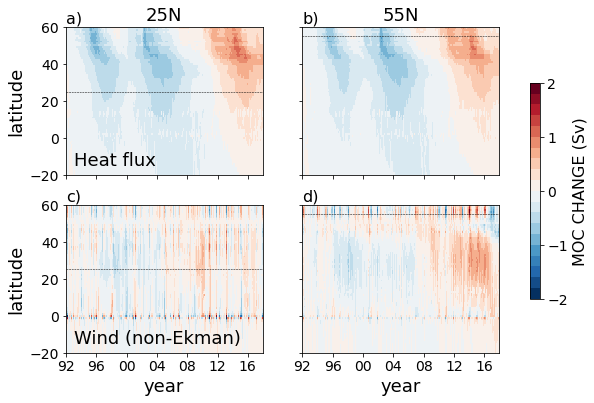

In [38]:
fig,ax=plt.subplots(2,3)
CMAP=plt.cm.get_cmap('RdBu_r',20).__copy__();CMAP.set_bad('k')
NM1=1;VLIM=2
p=ax[0,0].pcolormesh(t,lat,sig.fftconvolve(MOC25_hflux-MOCv4_cntrl,\
                                           np.ones((NM1,1))/NM1,mode='same'),cmap=CMAP,shading='nearest',vmin=-VLIM,vmax=VLIM);#fig.colorbar(p,ax=ax[0,0])
p=ax[0,1].pcolormesh(t,lat,sig.fftconvolve(MOC55_hflux-MOCv4_cntrl,\
                                           np.ones((NM1,1))/NM1,mode='same'),cmap=CMAP,shading='nearest',vmin=-VLIM,vmax=VLIM);#fig.colorbar(p,ax=ax[0,3])
p=ax[1,0].pcolormesh(t,lat,sig.fftconvolve((MOC25_tauxy-MOCv4_cntrl)-(EKM25_tauxy-EKMv4_cntrl),\
                                           np.ones((NM1,1))/NM1,mode='same'),cmap=CMAP,shading='nearest',vmin=-VLIM,vmax=VLIM);#fig.colorbar(p,ax=ax[1,0])
p=ax[1,1].pcolormesh(t,lat,sig.fftconvolve((MOC55_tauxy-MOCv4_cntrl)-(EKM55_tauxy-EKMv4_cntrl),\
                                           np.ones((NM1,1))/NM1,mode='same'),cmap=CMAP,shading='nearest',vmin=-VLIM,vmax=VLIM);#fig.colorbar(p,ax=ax[1,3])

[A.axhline(25,color='k',linestyle='--',linewidth=0.5) for A in ax[:,0]]
[A.axhline(55,color='k',linestyle='--',linewidth=0.5) for A in ax[:,1]]
ax[0,0].set_title('25N',fontsize=18)
ax[0,1].set_title('55N',fontsize=18)
[A.set_ylabel('latitude',fontsize=18) for A in ax[:,0]]
[A.tick_params(axis='both', which='major', labelsize=14) for A in ax.flatten()]

[A.xaxis.set_major_formatter(mdates.DateFormatter('%y')) for A in ax[-1,:]]

ax[0,0].text(t.values[12],-15,'Heat flux',fontsize=18)
# ax[1,0].text(t.values[12],-15,'WIND (FULL)',fontsize=18)
ax[1,0].text(t.values[12],-15,'Wind (non-Ekman)',fontsize=18)
[A.set_ylim(-20,60) for A in ax.flatten()]
[A.set_xlabel('year',fontsize=18) for A in ax[1,:]]
[A.set_xticklabels([]) for A in ax[0,:].flatten()]
[A.set_yticklabels([]) for A in ax[:,1:].flatten()]
# colorbar
[A.set_visible(False) for A in ax[:,-1]]
cbax=fig.add_axes([0.66,0.25,0.02,0.5])
cb=fig.colorbar(p,ax=cbax,fraction=0.9)
cb.ax.set_ylabel('MOC CHANGE (Sv)',fontsize=16)
cb.ax.tick_params(labelsize=14)
cbax.set_visible(False)
[ax.flatten()[i].text(t.values[0],62,['a)','b)','_','c)','d)','_'][i],fontsize=16) for i in range(len(ax.flatten()))]


fig.set_size_inches(12,6)#

## Figure 4: Low-pass filter plots

In [9]:
%%time
NMmax=120 #Maximum number of months to use as a low-pass window
ze=np.zeros((NMmax,MOCv4r4.shape[0]))
LPM55_hflux=ze.copy();LPM25_hflux=ze.copy()
LPM55_tauxy=ze.copy();LPM25_tauxy=ze.copy()

LPMv4r4    =ze.copy();
# Loop over the number of months and take the variance of the MOC time series with a boxcar of that many months applied
for i in np.arange(NMmax):
    NM=np.arange(1,NMmax+1)[i]
    LPMv4_cntrl[i,:]=np.nanvar(sig.fftconvolve(MOCv4_cntrl[     :,:],np.ones((1,NM))/(NM),mode='valid'),axis=1)
    
    LPM55_hflux[i,:]=np.nanvar(sig.fftconvolve(MOC55_hflux[:,:],np.ones((1,NM))/(NM),mode='valid'),axis=1)
    LPM25_hflux[i,:]=np.nanvar(sig.fftconvolve(MOC25_hflux[:,:],np.ones((1,NM))/(NM),mode='valid'),axis=1)
    
    LPM55_tauxy[i,:]=np.nanvar(sig.fftconvolve(MOC55_tauxy[:,:],np.ones((1,NM))/(NM),mode='valid'),axis=1)
    LPM25_tauxy[i,:]=np.nanvar(sig.fftconvolve(MOC25_tauxy[:,:],np.ones((1,NM))/(NM),mode='valid'),axis=1)
    

CPU times: user 2.12 s, sys: 28.5 ms, total: 2.15 s
Wall time: 2.34 s


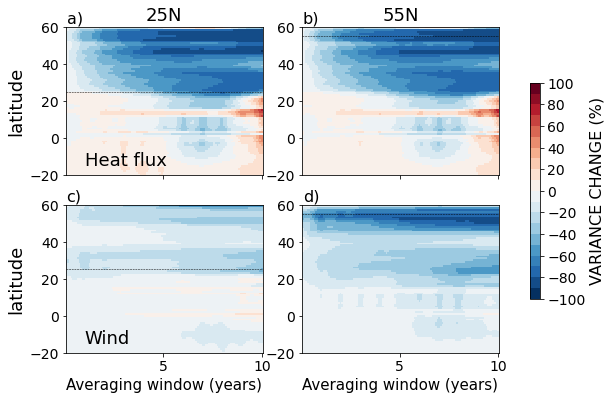

In [23]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

fig,ax=plt.subplots(2,3)
CMAP=plt.cm.get_cmap('RdBu_r',20).__copy__();CMAP.set_bad('k')
avgs=(np.arange(NMmax)+1)/12.
p=ax[0,0].pcolormesh(avgs,lat,(100*(LPM25_hflux-LPMv4_cntrl)/LPMv4_cntrl).T,cmap=CMAP,shading='nearest',vmin=-100,vmax=100);#fig.colorbar(p,ax=ax[0,0])
p=ax[0,1].pcolormesh(avgs,lat,(100*(LPM55_hflux-LPMv4_cntrl)/LPMv4_cntrl).T,cmap=CMAP,shading='nearest',vmin=-100,vmax=100);#

p=ax[1,0].pcolormesh(avgs,lat,(100*(LPM25_tauxy-LPMv4_cntrl)/LPMv4_cntrl).T,cmap=CMAP,shading='nearest',vmin=-100,vmax=100);#fig.colorbar(p,ax=ax[0,0])
p=ax[1,1].pcolormesh(avgs,lat,(100*(LPM55_tauxy-LPMv4_cntrl)/LPMv4_cntrl).T,cmap=CMAP,shading='nearest',vmin=-100,vmax=100);#

[A.set_xlabel('Averaging window (years)',fontsize=15) for A in ax[1,:]]
[A.tick_params(axis='both',labelsize=14) for A in ax.flatten()]
[A.set_ylim(-20,60) for A in ax.flatten()]
[A.axhline(25,color='k',linestyle='--',linewidth=0.5) for A in ax[:,0]]
[A.axhline(55,color='k',linestyle='--',linewidth=0.5) for A in ax[:,1]]
ax[0,0].set_title('25N',fontsize=18)
ax[0,1].set_title('55N',fontsize=18)
[A.set_ylabel('latitude',fontsize=18) for A in ax[:,0]]
ax[0,0].text(1,-15,'Heat flux',fontsize=18)
ax[1,0].text(1,-15,'Wind',fontsize=18)
[A.set_xticklabels([]) for A in ax[0,:]]
# colorbar
[A.set_visible(False) for A in ax[:,-1]]
[ax.flatten()[i].text(avgs[0],62,['a)','b)','_','c)','d)','_'][i],fontsize=16) for i in range(len(ax.flatten()))]
cbax=fig.add_axes([0.66,0.25,0.02,0.5])
cb=fig.colorbar(p,ax=cbax,fraction=0.9,ticks=np.arange(-100,120,20))
cb.ax.set_ylabel('VARIANCE CHANGE (%)',fontsize=16)
cb.ax.tick_params(labelsize=14)
cbax.set_visible(False)
fig.set_size_inches(12,6)
fig.savefig('figures_pdf/figure_4.png',bbox_inches='tight')

# Figure 6: perturbed run maps and Hovmöller plots

In [4]:
# Load density anomalies
ρDS25_hflux=xr.open_dataset(eccorundir+'DPC25_hflux/RHOAnoma.nc')
ρDS55_hflux=xr.open_dataset(eccorundir+'DPC55_hflux/RHOAnoma.nc')

ρDS25_tauxy=xr.open_dataset(eccorundir+'DPC25_tauxy/RHOAnoma.nc')
ρDS55_tauxy=xr.open_dataset(eccorundir+'DPC55_tauxy/RHOAnoma.nc')

ρDSv4_cntrl=xr.open_dataset(eccorundir+'CONTROL/RHOAnoma.nc')

In [5]:
%%time

ρdz55hf=((ρDS55_hflux.RHOAnoma - ρDSv4_cntrl.RHOAnoma)*(GDS.drF)).sum('k').values.reshape(-1,13*90*90)[:,Ti]
ρdz25hf=((ρDS25_hflux.RHOAnoma - ρDSv4_cntrl.RHOAnoma)*(GDS.drF)).sum('k').values.reshape(-1,13*90*90)[:,Ti]
ρdz25uv=((ρDS25_tauxy.RHOAnoma - ρDSv4_cntrl.RHOAnoma)*(GDS.drF)).sum('k').values.reshape(-1,13*90*90)[:,Ti]
ρdz55uv=((ρDS55_tauxy.RHOAnoma - ρDSv4_cntrl.RHOAnoma)*(GDS.drF)).sum('k').values.reshape(-1,13*90*90)[:,Ti]

CPU times: user 19.4 s, sys: 33.3 s, total: 52.8 s
Wall time: 1min 1s


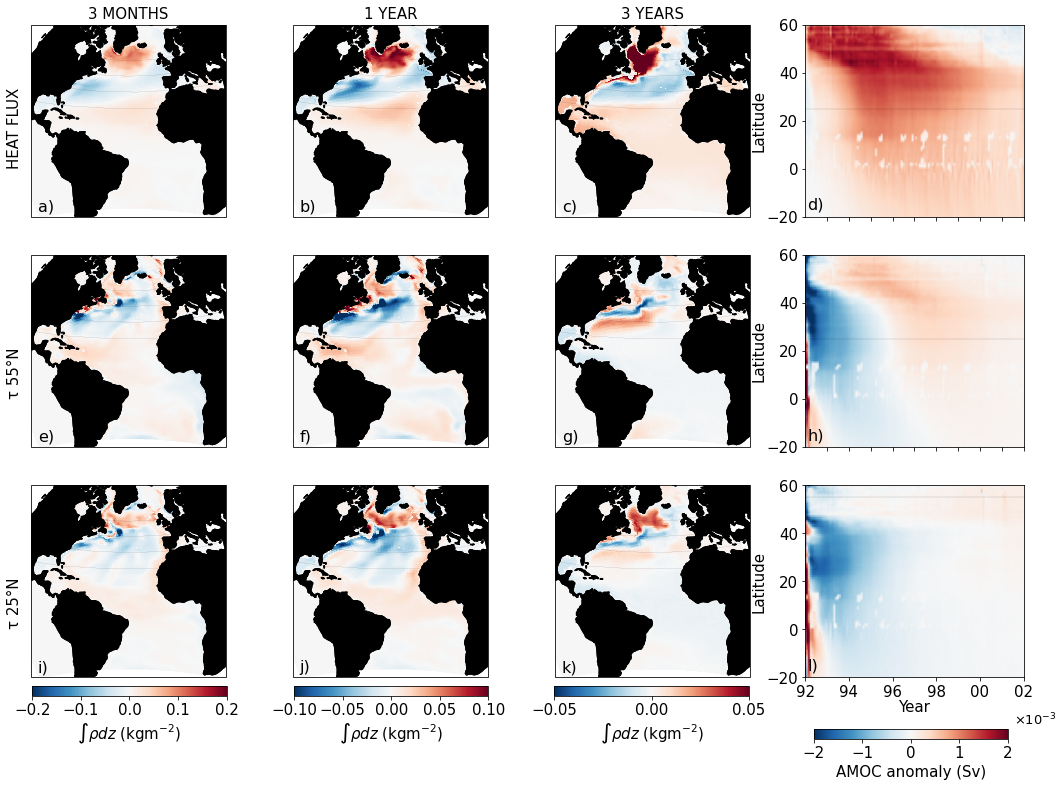

In [8]:
fig,ax=plt.subplots(3,4)
VLIMS=[0.2,0.1,0.05]
for i in range(3):
    ti=[1,3,36][i]
    VLIM=VLIMS[i]
    p0,AX=unpack_map(ρdz55hf[ti,:],ax=ax[0,i],vmin=-VLIM,vmax=VLIM,cmap='RdBu_r');ax[0,i]=AX;#fig.colorbar(p,ax=AX);
    p1,AX=unpack_map(ρdz25uv[ti,:],ax=ax[1,i],vmin=-VLIM,vmax=VLIM,cmap='RdBu_r');ax[1,i]=AX;#fig.colorbar(p,ax=AX)
    p2,AX=unpack_map(ρdz55uv[ti,:],ax=ax[2,i],vmin=-VLIM,vmax=VLIM,cmap='RdBu_r');ax[2,i]=AX;#fig.colorbar(p,ax=AX)
[[a.plot([-100,100],[L,L],transform=ccrs.PlateCarree(),color='k',linestyle='--',linewidth=0.1) for a in ax[:,:3].flatten()] for L in [25,35,45,55]]

cbax=fig.add_axes([0.135,0.1,0.15,0.1])
cbax.set_visible(False)
p00=cbax.pcolormesh(np.random.randn(3,3),vmin=-VLIMS[0],vmax=VLIMS[0],cmap='RdBu_r')
cb=fig.colorbar(p00,ax=cbax,orientation='horizontal')
cb.set_label(r'$\int ρ dz$ (kgm$^{-2}$)',fontsize=15)
cb.ax.tick_params(axis='both', which='major', labelsize=15)

cbax=fig.add_axes([0.337,0.1,0.15,0.1])
p11=cbax.pcolormesh(np.random.randn(3,3),vmin=-VLIMS[1],vmax=VLIMS[1],cmap='RdBu_r')
cbax.set_visible(False)
cb=fig.colorbar(p11,ax=cbax,orientation='horizontal')
cb.set_label(r'$\int ρ dz$ (kgm$^{-2}$)',fontsize=15)
cb.ax.tick_params(axis='both', which='major', labelsize=15)

cbax=fig.add_axes([0.538,0.1,0.15,0.1])
p22=cbax.pcolormesh(np.random.randn(3,3),vmin=-VLIMS[2],vmax=VLIMS[2],cmap='RdBu_r')
cbax.set_visible(False)
cb=fig.colorbar(p22,ax=cbax,orientation='horizontal')
cb.set_label(r'$\int ρ dz$ (kgm$^{-2}$)',fontsize=15)
cb.ax.tick_params(axis='both', which='major', labelsize=15)
cb.ax.set_xticks([-VLIMS[2],0,VLIMS[2]])

VLIM=2
p=ax[0,-1].pcolormesh(MOCv4_cntrl.time,MOCv4r4.lat,1e3*(MOC55_hflux-MOCv4_cntrl).T,vmin=-VLIM,vmax=VLIM,cmap='RdBu_r',shading='gouraud')
p=ax[1,-1].pcolormesh(MOCv4_cntrl.time,MOCv4r4.lat,1e3*(MOC55_tauxy-MOCv4_cntrl).T,vmin=-VLIM,vmax=VLIM,cmap='RdBu_r',shading='gouraud')
p=ax[2,-1].pcolormesh(MOCv4_cntrl.time,MOCv4r4.lat,1e3*(MOC25_tauxy-MOCv4_cntrl).T,vmin=-VLIM,vmax=VLIM,cmap='RdBu_r',shading='gouraud')
[a.set_xlim(MOCv4r4.time.values[0],MOCv4r4.time.values[120]) for a in ax[:,-1]]
[a.set_ylim(-20,60) for a in ax[:,-1]]
[a.xaxis.set_major_formatter(mdates.DateFormatter('%y')) for a in ax[:,-1]]
# [[a.axhline(L,linewidth=0.1,color='k') for a in ax[:,-1]] for L in [25,55]]
ax[0,-1].axhline(25,linewidth=0.1,color='k')
ax[1,-1].axhline(25,linewidth=0.1,color='k')
ax[2,-1].axhline(55,linewidth=0.1,color='k')
[a.set_ylabel('Latitude',fontsize=15,labelpad=0) for a in ax[:,-1]]
[a.set_xticklabels([]) for a in ax[:-1,-1]]
ax[-1,-1].set_xticks([MOCv4r4.time.values[i] for i in [0,24,48,72,96,120]])
ax[-1,-1].set_xlabel('Year',fontsize=15,labelpad=0)
[a.tick_params(axis='both', which='major', labelsize=15) for a in ax.flatten()]

cbax=fig.add_axes([0.738,0.05,0.15,0.1])
p22=cbax.pcolormesh(np.random.randn(3,3),vmin=-VLIM,vmax=VLIM,cmap='RdBu_r')
cbax.set_visible(False)
cb=fig.colorbar(p22,ax=cbax,orientation='horizontal')
cb.set_label('AMOC anomaly (Sv)',fontsize=15)
cb.ax.tick_params(axis='both', which='major', labelsize=15)
ax[-1,-1].text(MOCv4_cntrl.time.values[115],-40,r'$\times10^{-3}$',fontsize=13)

[ax[i,0].text(-8e6,[-1e6,-1e6,-1e6][i],['HEAT FLUX','τ 55°N','τ 25°N'][i],rotation=90,fontsize=15) for i in range(3)]
# fig.colorbar(p,ax=ax[0,-1])
ax[0,0].set_title('3 MONTHS',fontsize=15)
ax[0,1].set_title('1 YEAR',fontsize=15)
ax[0,2].set_title('3 YEARS',fontsize=15)

[ax.flatten()[i].text(-6e6,-4e6,['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)'][i],fontsize=16) for i in [0,1,2,4,5,6,8,9,10]]
[ax.flatten()[i].text(MOCv4r4.time.values[1],-17,['a)','b)','c)','d)','e)','f)','g)','h)','i)','j)','k)','l)'][i],fontsize=16) for i in [3,7,11]]
fig.set_size_inches(18,12)
